Model trained! Test MAE: 0.28 hours

🧠 AI Sleep Recommendations:
 - Your predicted sleep of 8.3h is consistent with current patterns.
 - Elevated heart rate before sleep may reduce sleep quality. Try relaxation techniques.
 - Consider adding 10+ minutes of mindfulness or meditation before bedtime.


/Users/shaankohli/Documents/Sleep Analysis/Apple Health Sleep Analysis/src/ai_sleep.py:87: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  features[col] = features[col].view('int64') / 1e9  # convert to seconds
/Users/shaankohli/Documents/Sleep Analysis/Apple Health Sleep Analysis/src/ai_sleep.py:113: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  latest[col] = latest[col].view('int64') / 1e9


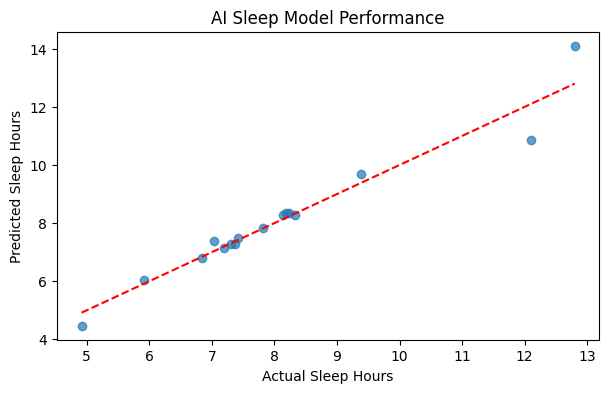

In [14]:
import sys, os
sys.path.append(os.path.abspath("../src"))
import importlib
import parse_apple_health
import ai_sleep
importlib.reload(parse_apple_health)
importlib.reload(ai_sleep)

from parse_apple_health import parse_sleep_records, parse_health_metrics
import pandas as pd
from ai_sleep import engineer_features, train_sleep_model, generate_recommendations
from parse_apple_health import parse_health_metrics  

# Load processed data
daily_sleep = pd.read_csv("results/daily_sleep_summary.csv")
sleep_df = pd.read_csv("results/sleep_df.csv")

# Parse health metrics from export.xml
health_df = parse_health_metrics("../data/export.xml")  # <- add this

# Engineer features including health metrics
feature_df = engineer_features(daily_sleep, sleep_df, health_df=health_df)  # <- updated

# Train AI model
model, X_test, y_test, preds = train_sleep_model(feature_df)

# Generate AI recommendations
recs, pred_sleep = generate_recommendations(feature_df, model)

print("\n🧠 AI Sleep Recommendations:")
for r in recs:
    print(" -", r)

# Plot predicted vs actual sleep
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.scatter(y_test, preds, alpha=0.7)
plt.xlabel("Actual Sleep Hours")
plt.ylabel("Predicted Sleep Hours")
plt.title("AI Sleep Model Performance")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [ ]:
from ai_sleep import ai_analyze_sleep_patterns

df = pd.read_csv("results/daily_sleep_summary.csv")

insights = ai_analyze_sleep_patterns(df)
print(insights)


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}